In [1043]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   


In [1044]:
# renaming the features
# # rename the columns 
# it does not have column name, add column name.
# df.columns  = ['UserId', 'Game','Play','hrs_play','0' ]
# df.head()


In [1045]:
df = pd.read_csv('steam-200k.csv')
df = pd.read_csv("steam-200k.csv", header=None, index_col=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df.head()

#copying
dfc = df.copy()

df = df.drop(columns='Other')



# lets see how many duplicate value in the Game feature.
x = df['Game'].nunique()

print(x) # there are 5155 unique Games.
dupG = df[df.duplicated('Game', keep=False)]

Ft_oc = df['Game'].value_counts()



# set the purchase hours to 0 
df 

df.loc[df['Action']=="purchase", "Hours"] = 0

# # drop the Action feature
# df = df.drop(columns='Action')
df


# we the slice erroe comes up becaue we are making a permanent change. so make a change, copy it, like push it to df.

# data consistency check.
is_same_type = df['UserID'].dtype == df['UserID'].iloc[0].dtype
is_same_type

x = df['UserID'].nunique()
x 

df

# no trimming 



df

5155


,UserID,Game,Action,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,0.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,0.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,0.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,0.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,0.0


In [1046]:
# trimming 


def trim1(df):
    # Remove duplicates
    df = df.drop_duplicates() # trim1 

    # Calculate play and purchase counts
    play_counts = df[df['Action'] == 'play'].groupby('Game')['UserID'].nunique() 
    purchase_counts = df[df['Action'] == 'purchase'].groupby('Game')['UserID'].nunique()
    # Calculate retention rate
    retention_rate = (play_counts / purchase_counts).fillna(0)  # Handle divide-by-zero cases
    # Create a DataFrame for retention rate
    retention_rate_df = retention_rate.reset_index(name='retention_rate')
    # Merge the retention rate back into the original DataFrame
    df = df.merge(retention_rate_df, on='Game', how='left')

    # Identify rows with 'play' action
    play_rows = df[df["Action"] == "play"]

    # Create a set of (UserID, Game) pairs for 'play' action
    play_pairs = set(zip(play_rows["UserID"], play_rows["Game"]))

    # Filter out rows where (UserID, Game) is in play_pairs and Action is 'purchase'
    df = df[~((df["Action"] == "purchase") & (df[["UserID", "Game"]].apply(tuple, axis=1).isin(play_pairs)))]  # trim 2
    
    #    # Remove purchase rows
    # df = df[df['Action'] != 'purchase']

    # User-specific calculations
    df['Tot_hrs_played'] = df.groupby('UserID')['Hours'].transform('sum')
    df['User_count'] = df.groupby('UserID')['UserID'].transform('count')
    df['Avg_play_time'] = df['Tot_hrs_played'] / df['User_count']
    df['#Game'] = df.groupby('UserID')['Game'].transform('nunique')

 
        
    df = df[["UserID","Game","Hours", 'Action', "retention_rate",	"Tot_hrs_played",	"Avg_play_time"	,"#Game"]]

    return df

        

df = trim1(df)



#lets check for duplicate data
dfg = df[df.duplicated()]



def trim2(df):
    
    # User-specific calculations
    df['Tot_hrs_played'] = df.groupby('UserID')['Hours'].transform('sum')
    df['User_count'] = df.groupby('UserID')['UserID'].transform('count')
    df['Avg_play_time'] = df['Tot_hrs_played'] / df['User_count']
    df['#Game'] = df.groupby('UserID')['Game'].transform('nunique')
    
    return df
    











df[df['UserID'] == 151603712]

,UserID,Game,Hours,Action,retention_rate,Tot_hrs_played,Avg_play_time,#Game
1,151603712,The Elder Scrolls V Skyrim,273.0,play,0.944212,439.9,10.9975,40
3,151603712,Fallout 4,87.0,play,0.994048,439.9,10.9975,40
5,151603712,Spore,14.9,play,0.865672,439.9,10.9975,40
7,151603712,Fallout New Vegas,12.1,play,0.851632,439.9,10.9975,40
9,151603712,Left 4 Dead 2,8.9,play,0.842271,439.9,10.9975,40
11,151603712,HuniePop,8.5,play,0.909091,439.9,10.9975,40
13,151603712,Path of Exile,8.1,play,0.563422,439.9,10.9975,40
15,151603712,Poly Bridge,7.5,play,1.000000,439.9,10.9975,40
17,151603712,Left 4 Dead,3.3,play,0.725979,439.9,10.9975,40
19,151603712,Team Fortress 2,2.8,play,1.000000,439.9,10.9975,40


### Understanding the features: 

1. UserId = The primary key representing the player. The userId.
2. Game = Game Title
3. Action = played and purchased.
4. Other = Don't know 


### Feature Creation 
- User specific  
- Game Specific  


In [1047]:




# # drop the Action feature
# df = df.drop(columns='Action')






In [1048]:



# # Calculate the count of each UserID
# user_counts = df['UserID'].value_counts()

# # Map the counts back to the DataFrame
# df['User_count'] = df['UserID'].map(user_counts)





# # Calculate retention rate
# pivot_table['rtn_rate'] = pivot_table['play'] / pivot_table['purchase']

# # Merge the retention rate back into the original DataFrame
# df = df.merge(pivot_table['rtn_rate'], on='Game', how='left')

# # Game specific

# #1. % of tot Time spent on each game.
# df.loc[:, 'Hr_rate'] = (df['Hours']/df['Tot_hrs_played'])*100

# #2. Pop_scr = Number of ppl that have played this game

# df['Pop_src'] = df.groupby('Game')['UserID'].transform('count')

# Median Playtime.


# Game retention. % of user who played a specific game after purchasing. How much the game was successful in 




# we have to remove the purchase value from the Action feature.
# for the same UserID, if the Game is Play, then for that UserID, remove the Game purchase row





# # Filter out rows where (UserID, Game) is in play_pairs and Action is 'purchase'
# filtered_df = df[~((df["Action"] == "purchase") & (df[["UserID", "Game"]].apply(tuple, axis=1).isin(play_pairs)))]

# trimming.


# # drop the Action feature
# df = df.drop(columns='Action') 


 # text cleaning, remove the spaces from the name of games. 
# df['Game'] = df['Game'].str.replace(' ','')



In [1049]:






df 

df   # df trimmed 


df[df['UserID'] == 151603712]






,UserID,Game,Hours,Action,retention_rate,Tot_hrs_played,Avg_play_time,#Game
1,151603712,The Elder Scrolls V Skyrim,273.0,play,0.944212,439.9,10.9975,40
3,151603712,Fallout 4,87.0,play,0.994048,439.9,10.9975,40
5,151603712,Spore,14.9,play,0.865672,439.9,10.9975,40
7,151603712,Fallout New Vegas,12.1,play,0.851632,439.9,10.9975,40
9,151603712,Left 4 Dead 2,8.9,play,0.842271,439.9,10.9975,40
11,151603712,HuniePop,8.5,play,0.909091,439.9,10.9975,40
13,151603712,Path of Exile,8.1,play,0.563422,439.9,10.9975,40
15,151603712,Poly Bridge,7.5,play,1.000000,439.9,10.9975,40
17,151603712,Left 4 Dead,3.3,play,0.725979,439.9,10.9975,40
19,151603712,Team Fortress 2,2.8,play,1.000000,439.9,10.9975,40


In [1050]:
# we have to remove the purchase value from the Action feature.
# for the same UserID, if the Game is Play, then for that UserID, remove the Game purchase row

# # Identify rows with 'play' action
# play_rows = df[df["Action"] == "play"]

# # Create a set of (UserID, Game) pairs for 'play' action
# play_pairs = set(zip(play_rows["UserID"], play_rows["Game"]))

# # Filter out rows where (UserID, Game) is in play_pairs and Action is 'purchase'
# filtered_df = df[~((df["Action"] == "purchase") & (df[["UserID", "Game"]].apply(tuple, axis=1).isin(play_pairs)))]

# print(filtered_df)




### Feature Creation 
- User specific
- Game Specific 


# Explaining all the features.
- UserId : Individuals who bought the game.
- Game: Game title 
- Hours: This game played by a specific user
- Tot_hrs_played: How many hrs did the player played all the game in total.
- #Games: How many games each player has bought.
- Avg_play-time: mean hours of gameplay per game.
- rtn_rate : Retention rate of that game. How successfull that game was, in turning purchase to play. 1 means all puchase is play.
- Hr_rate: % of tot Time spent on each game. Like favourite score.
- Pop_scr: No of ppl that have purchased this game.

Note: Play 0 hours means, purchased but not played

# Content based and Collaborative Recommender

- Content Based: It is based on the content of th

In [1051]:
df.describe()

# df['Hr_rate'] = df['Hr_rate'].fillna(0)
# df = df.drop(column = '')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128816 entries, 1 to 199292
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UserID          128816 non-null  int64  
 1   Game            128816 non-null  object 
 2   Hours           128816 non-null  float64
 3   Action          128816 non-null  object 
 4   retention_rate  128816 non-null  float64
 5   Tot_hrs_played  128816 non-null  float64
 6   Avg_play_time   128816 non-null  float64
 7   #Game           128816 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.8+ MB


### EDA
Insights
- Which game is highest played.
- Which game has more play time.
- Does avg_play time is dictated by which game you play the most ? 
- Does no of games dictates the total hours played ? 
- Does retention rate depend on how many players....

Univariate Analysis.  
Bivariate Analysis.  
Multivariate Analysis.  
Corelation Analysis.  



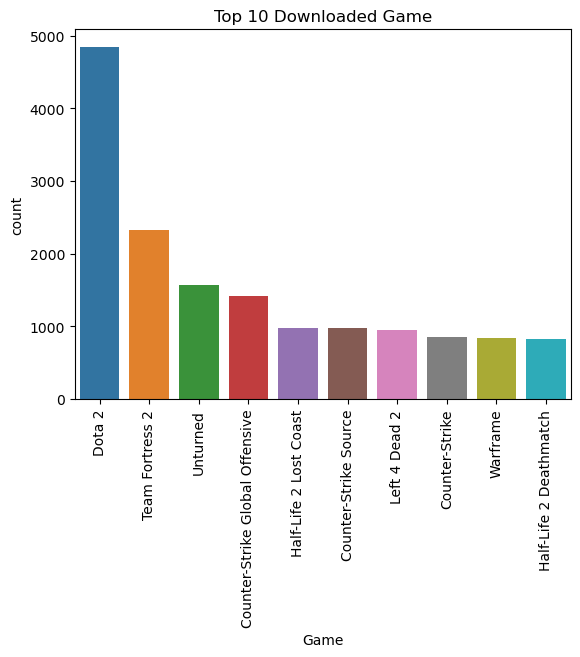

,UserID,Game,Hours,Action,retention_rate,Tot_hrs_played,Avg_play_time,#Game
9,151603712,Left 4 Dead 2,8.9,play,0.842271,439.9,10.99750,40
19,151603712,Team Fortress 2,2.8,play,1.000000,439.9,10.99750,40
43,151603712,Dota 2,0.5,play,1.000000,439.9,10.99750,40
67,187131847,Dota 2,2.3,play,1.000000,2.3,2.30000,1
97,59945701,Counter-Strike Global Offensive,2.3,play,0.975212,467.8,10.87907,43
...,...,...,...,...,...,...,...,...
199248,176449171,Team Fortress 2,0.9,play,1.000000,2016.7,252.08750,8
199249,176449171,Counter-Strike,0.0,purchase,0.663551,2016.7,252.08750,8
199252,176449171,Counter-Strike Source,0.0,purchase,0.731084,2016.7,252.08750,8
199254,221315846,Dota 2,9.0,play,1.000000,19.0,4.75000,4


In [1052]:
# which game is highest played 
# make a df of top 10 game, and visualize it.

# there are too much games, so we only had to take top 10 games.

top_games = df['Game'].value_counts().nlargest(10).index # take the game feature, count 
top_df = df[df['Game'].isin(top_games)]


sns.countplot(x='Game', data=top_df, order=top_games)
plt.title("Top 10 Downloaded Game")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


top_df

### Takeaway 
- Dota 2 is the most downloaded game.

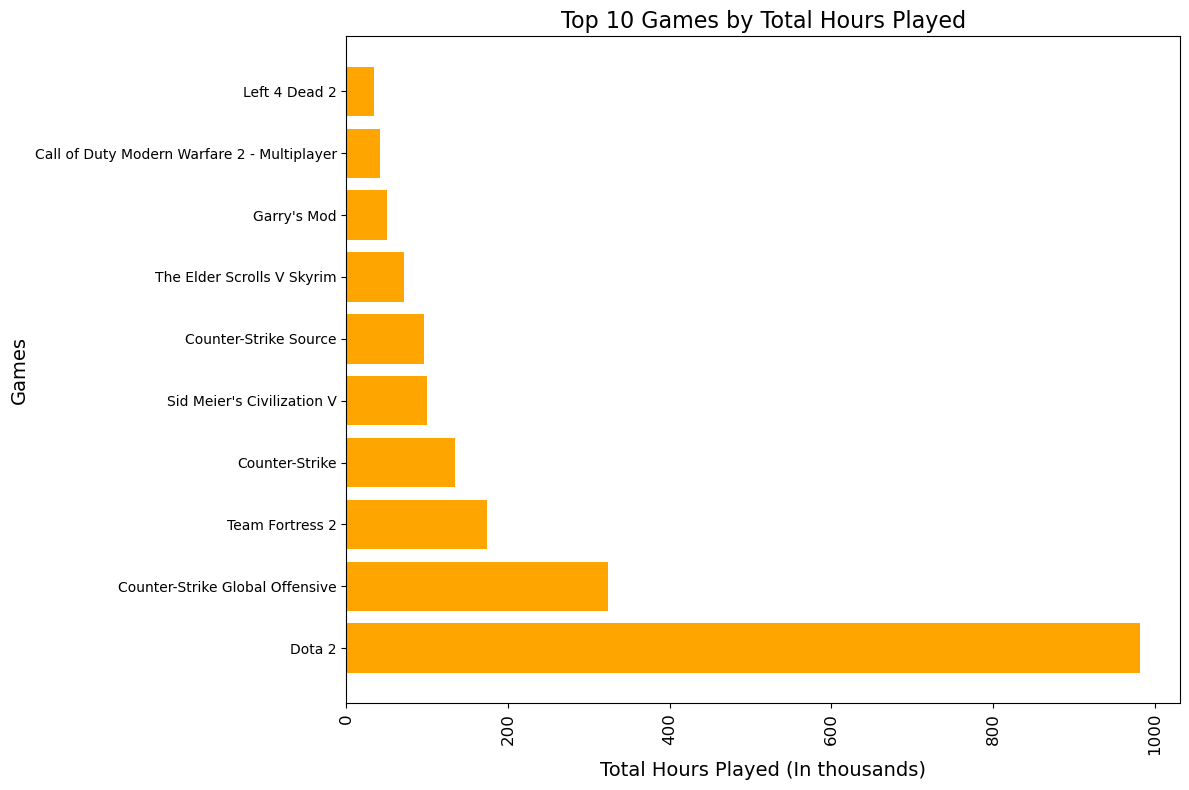

,Game,Hours
0,Dota 2,982.0
1,Counter-Strike Global Offensive,323.0
2,Team Fortress 2,174.0
3,Counter-Strike,134.0
4,Sid Meier's Civilization V,100.0
5,Counter-Strike Source,96.0
6,The Elder Scrolls V Skyrim,71.0
7,Garry's Mod,50.0
8,Call of Duty Modern Warfare 2 - Multiplayer,42.0
9,Left 4 Dead 2,34.0


In [1053]:
# Group by 'Game' and sum the 'Hours' for each game
total_hours = df.groupby('Game')['Hours'].sum()          

# Plot only the top 10 games
top_10_games = total_hours.sort_values(ascending=False).head(10)


top_10_games = round((pd.DataFrame(top_10_games/1000)).reset_index(),0)

plt.figure(figsize=(12, 8))
plt.barh(top_10_games['Game'], top_10_games['Hours'], color='orange')

# Add title and labels
plt.title('Top 10 Games by Total Hours Played', fontsize=16)
plt.xlabel('Total Hours Played (In thousands)', fontsize=14)
plt.ylabel('Games', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

top_10_games



# Plot flow.
# - Get the groupby, sum of hours per game.
# - sort it in sort_values(ascending = false), and get the top 10 value(head(10)), or the bar plot will plot all.
# - convert to dataframe.

#

### key takeway 
- Dota 2 is Most popular game on Steam. Has a very high total gameplay hours.
- This means, most ppl have played this game, but not highly addictive.

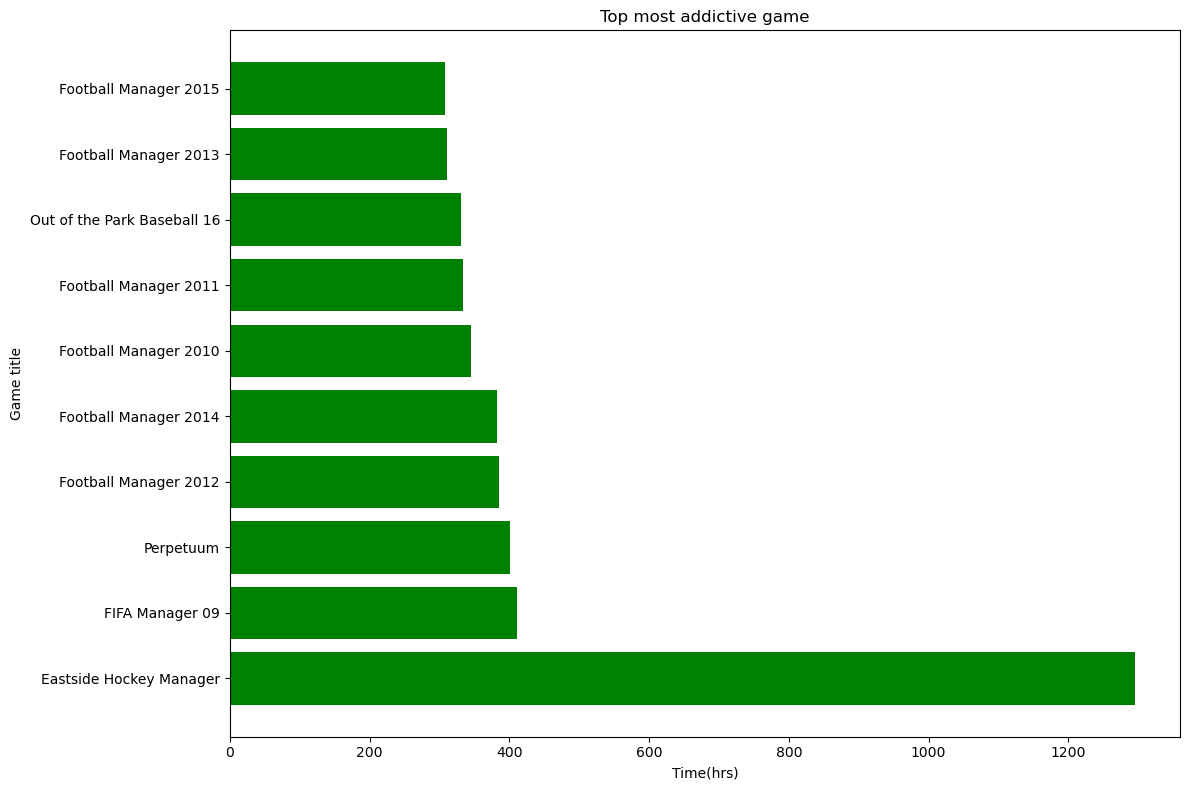

In [1054]:
# Now lets see how much time is spent on each game.
top_10_addictive = df.groupby('Game')['Hours'].mean()

top_10_addictive = top_10_addictive.sort_values(ascending= False).head(10)

top_10_addictive = pd.DataFrame({'Game':top_10_addictive.index, 'Avg_time_spent-per_game':top_10_addictive.values})

plt.figure(figsize=(12,8))
plt.barh(top_10_addictive['Game'],top_10_addictive['Avg_time_spent-per_game'], color = 'green')

plt.title("Top most addictive game")
plt.xlabel('Time(hrs)')
plt.ylabel('Game title')
plt.tight_layout()
plt.show()

### Key takeaways
- East side hockey is highly addictive game. THe players why play this game has an avg gameplay time of 1300 hours.
- It could be because the game came out a long time ago so it has a high avg gameplay. 
- or the players really like it.

In [1055]:


# df = df.groupby('UserID')['Game'].count()

## Collaborative filtering.
- First we have to calculate how many players per game should be a threshold.
- Calculate a robust Popularity fature
- 

<class 'pandas.core.frame.DataFrame'>
Index: 128816 entries, 1 to 199292
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UserID          128816 non-null  int64  
 1   Game            128816 non-null  object 
 2   Hours           128816 non-null  float64
 3   Action          128816 non-null  object 
 4   retention_rate  128816 non-null  float64
 5   Tot_hrs_played  128816 non-null  float64
 6   Avg_play_time   128816 non-null  float64
 7   #Game           128816 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.8+ MB


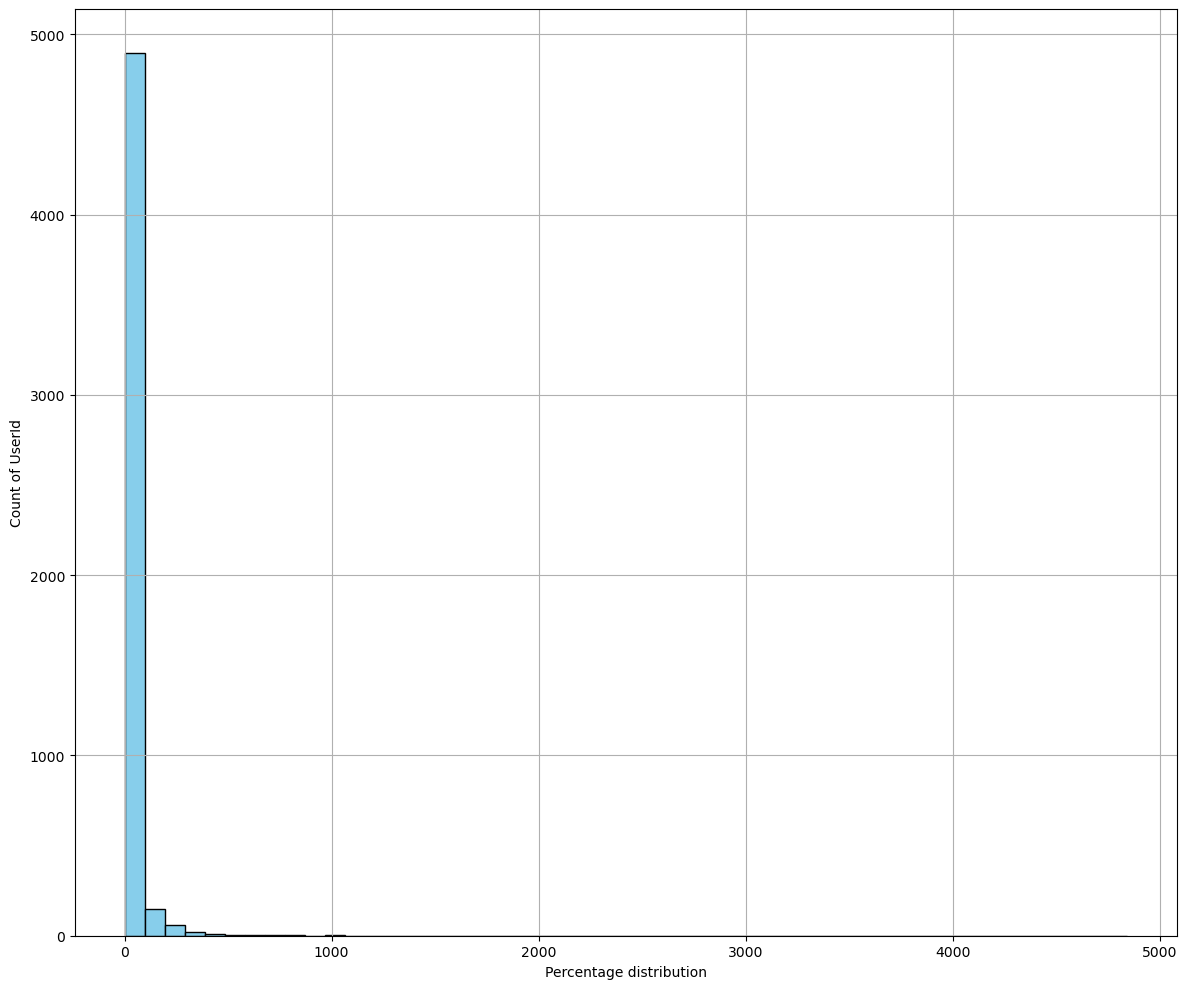

In [1056]:
# lets see how many players have played each game 

df.info()
User_cn = df.groupby('Game')['UserID'].count()
User_cn.sort_values(ascending=False)
# we can see that almost 5000 players have played the highest game, and 


# lets plot the histogram so that We can understand the distribution of percentage of players.
plt.figure(figsize=(12,10))
User_cn.hist(bins = 50, color = 'skyblue', edgecolor = 'black')
plt.xlabel("Percentage distribution")
plt.ylabel('Count of UserId')
plt.tight_layout()
plt.show()

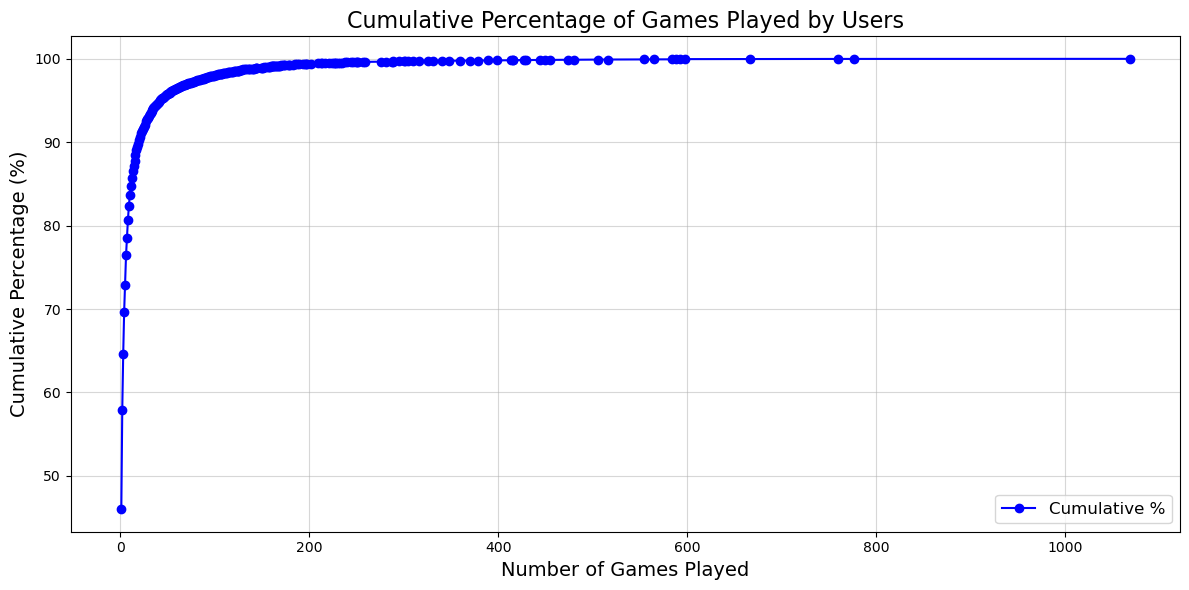

,Games Played,Cumulative Percentage
0,1,45.993706
1,2,57.903655
2,3,64.576777
3,4,69.684499
4,5,72.936335
...,...,...
234,597,99.967724
235,666,99.975793
236,759,99.983862
237,776,99.991931


In [1057]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by UserID to count the number of games each user has played
games_per_user = df.groupby('UserID')['Game'].nunique()

# Create a cumulative distribution table
cumulative_distribution = games_per_user.value_counts().sort_index().cumsum()
cumulative_percentage = (cumulative_distribution / cumulative_distribution.max()) * 100

# Convert to DataFrame for easier visualization
cumulative_df = pd.DataFrame({
    'Games Played': cumulative_distribution.index,
    'Cumulative Percentage': cumulative_percentage.values
}).reset_index(drop=True)

# Plot the cumulative percentage
plt.figure(figsize=(12, 6))
plt.plot(cumulative_df['Games Played'], cumulative_df['Cumulative Percentage'], marker='o', color='blue', label='Cumulative %')
plt.title('Cumulative Percentage of Games Played by Users', fontsize=16)
plt.xlabel('Number of Games Played', fontsize=14)
plt.ylabel('Cumulative Percentage (%)', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the cumulative table
cumulative_df





In [1058]:
df

,UserID,Game,Hours,Action,retention_rate,Tot_hrs_played,Avg_play_time,#Game
1,151603712,The Elder Scrolls V Skyrim,273.0,play,0.944212,439.9,10.99750,40
3,151603712,Fallout 4,87.0,play,0.994048,439.9,10.99750,40
5,151603712,Spore,14.9,play,0.865672,439.9,10.99750,40
7,151603712,Fallout New Vegas,12.1,play,0.851632,439.9,10.99750,40
9,151603712,Left 4 Dead 2,8.9,play,0.842271,439.9,10.99750,40
...,...,...,...,...,...,...,...,...
199284,128470551,Fallen Earth,2.4,play,0.396694,426.9,26.68125,16
199286,128470551,Magic Duels,2.2,play,0.714286,426.9,26.68125,16
199288,128470551,Titan Souls,1.5,play,0.800000,426.9,26.68125,16
199290,128470551,Grand Theft Auto Vice City,1.5,play,0.432692,426.9,26.68125,16


In [1059]:
# we will be excluding the users who have played 2
# games or less.
# df = df.drop(columns= "Action")

df_x = df[df['UserID'] == 151603712]
df_x


# lets see the number of times each game has been played.
df_1 = ((df['Game'].value_counts()))
df_1 = pd.DataFrame(df_1)


for i in range(0,15):
    ft_df = df_1[df_1['count']>i]
    print(ft_df.shape[0])
    
    
# lets keep 3 and above. We are going work with the dataset, that has the games that has been played at least by 3.



# df = df[df['#Games']>5] # filter the df to have games more than 2 

# filter the df to have at least 6 hours of gameplay
df = df[df["Hours"]>6]

trim2(df)
# df.sort_values(by = '#Games', ascending=True) # we have at least 3 games.

    
df[df['UserID'] == 5250]
    


5155
3985
3380
2986
2669
2436
2265
2118
1979
1885
1776
1699
1616
1534
1455


C:\Users\nafee\AppData\Local\Temp\ipykernel_119176\1995215736.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tot_hrs_played'] = df.groupby('UserID')['Hours'].transform('sum')
C:\Users\nafee\AppData\Local\Temp\ipykernel_119176\1995215736.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_count'] = df.groupby('UserID')['UserID'].transform('count')
C:\Users\nafee\AppData\Local\Temp\ipykernel_119176\1995215736.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,UserID,Game,Hours,Action,retention_rate,Tot_hrs_played,Avg_play_time,#Game,User_count
65229,5250,Cities Skylines,144.0,play,0.942623,219.6,73.2,3,3
65231,5250,Deus Ex Human Revolution,62.0,play,0.846626,219.6,73.2,3,3
65233,5250,Portal 2,13.6,play,0.832721,219.6,73.2,3,3


In [1060]:
# lets make a robust rating feature.

from sklearn.preprocessing import MinMaxScaler

# we have - retention rate, 

df['play_count'] = df.groupby('Game')['UserID'].transform('count')
df['total_hours'] = df.groupby('Game')['Hours'].transform('sum')
df['avg_hours'] = df.groupby('Game')['Hours'].transform('mean')

scaler = MinMaxScaler()
df[['play_count_norm', 'total_hours_norm', 'avg_hours_norm', 'retention_rate_norm']] = scaler.fit_transform(
    df[['play_count', 'total_hours', 'avg_hours', 'retention_rate']] )



# Define new weights
w1, w2, w3, w4 = 0.25, 0.25, 0.2, 0.3

# Recalculate hybrid popularity score
df['popularity_score'] = (
    w1 * df['play_count_norm'] +
    w2 * df['total_hours_norm'] +
    w3 * df['avg_hours_norm'] +
    w4 * df['retention_rate_norm']
)





df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 31541 entries, 1 to 199274
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UserID               31541 non-null  int64  
 1   Game                 31541 non-null  object 
 2   Hours                31541 non-null  float64
 3   Action               31541 non-null  object 
 4   retention_rate       31541 non-null  float64
 5   Tot_hrs_played       31541 non-null  float64
 6   Avg_play_time        31541 non-null  float64
 7   #Game                31541 non-null  int64  
 8   User_count           31541 non-null  int64  
 9   play_count           31541 non-null  int64  
 10  total_hours          31541 non-null  float64
 11  avg_hours            31541 non-null  float64
 12  play_count_norm      31541 non-null  float64
 13  total_hours_norm     31541 non-null  float64
 14  avg_hours_norm       31541 non-null  float64
 15  retention_rate_norm  31541 non-null  flo

C:\Users\nafee\AppData\Local\Temp\ipykernel_119176\153321754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['play_count'] = df.groupby('Game')['UserID'].transform('count')
C:\Users\nafee\AppData\Local\Temp\ipykernel_119176\153321754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_hours'] = df.groupby('Game')['Hours'].transform('sum')
C:\Users\nafee\AppData\Local\Temp\ipykernel_119176\153321754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [1061]:


dfx = df[["UserID", "Game", "popularity_score"]]


# Add a small constant to avoid log(0)
epsilon = 1e-6
df['popularity_score_log'] = np.log(df['popularity_score'] + epsilon)



dfp = dfx.pivot_table(
    index = 'Game',
    columns ='UserID',
    values='popularity_score'
)
dfp.fillna(0, inplace = True)

dfp

C:\Users\nafee\AppData\Local\Temp\ipykernel_119176\285279600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity_score_log'] = np.log(df['popularity_score'] + epsilon)


UserID,5250,76767,86540,229911,298950,547685,554278,561758,577614,622362,...,308503685,308563852,308638385,308819212,308851621,309107542,309188905,309213952,309404240,309626088
Game,,,,,,,,,,,,,,,,,,,,,
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100% Orange Juice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Labours of Hercules,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Labours of Hercules II The Cretan Bull,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Labours of Hercules III Girl Power,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
realMyst Masterpiece Edition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
resident evil 4 / biohazard 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sZone-Online,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1062]:
from sklearn.metrics.pairwise import cosine_similarity

sim_src = cosine_similarity(dfp)

sim_src


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 0.23570226,
        1.        ]])

In [1063]:
# make the recommender function 

def recommend(game):
    index = np.where(dfp.index == game)[0][0]
    sim_itm = sorted(list(enumerate(sim_src[index])), key = lambda x:x[1], reverse = True)[1:6]
    
    for i in sim_itm:
        print(dfp.index[i[0]])
        
    return game 
        





In [1067]:
recommend('Far Cry')

Cloudberry Kingdom
Everyday Genius SquareLogic
Galactic Civilizations I Ultimate Edition
Hyperdimension Neptunia Re;Birth1
liteCam Game 100 FPS Game Capture


'Far Cry'